In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [ ]:
df_nsclc = pd.read_csv("NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv")

In [ ]:
df_nsclc.columns

Calculate the proportion where the patient is NOT dead at the end of trial:

In [ ]:
1-df_nsclc['deadstatus.event'].mean()

Weird values for T:

In [ ]:
df_nsclc[df_nsclc['clinical.T.Stage']>4]

In [ ]:
df_nsclc[df_nsclc['Overall.Stage'].isna()]

Impute this value: overall.stage should be IIIa

In [ ]:
df_nsclc_clean = df_nsclc.copy()

In [ ]:
df_nsclc_clean['Overall.Stage'].fillna('IIIa', inplace=True)

In [ ]:
df_nsclc_clean[df_nsclc_clean['Overall.Stage'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['gender'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['Survival.time'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['age'].isna()]

In [ ]:
df_nsclc_clean = pd.get_dummies(data = df_nsclc_clean, columns=['gender'], drop_first=True)

In [ ]:
df_nsclc_clean.head()

In [ ]:
df_nsclc_clean['gender_male'].mean()

In [ ]:
df_nsclc_clean[df_nsclc_clean['deadstatus.event']==0].describe()

In [ ]:
df_nsclc_clean[df_nsclc_clean['deadstatus.event']==0]['Survival.time'].plot(kind='hist')

In [ ]:
df_nsclc_clean['PatientID'].unique()

In [ ]:
from lifelines import KaplanMeierFitter

In [ ]:
# Trying out KM plotter
kmf = KaplanMeierFitter()

kmf.fit(df_nsclc_clean['Survival.time'], df_nsclc_clean['deadstatus.event'])
kmf.plot()

In [ ]:
df_nsclc_clean['Histology'].unique()

In [ ]:
df_surv_lc = df_nsclc_clean[df_nsclc_clean['Histology']=='large cell']
df_surv_sc = df_nsclc_clean[df_nsclc_clean['Histology']=='squamous cell carcinoma']
df_surv_ad = df_nsclc_clean[df_nsclc_clean['Histology']=='adenocarcinoma']
df_surv_nos = df_nsclc_clean[df_nsclc_clean['Histology']=='nos']

In [ ]:
plt.figure(figsize=(10,7))

kmf.fit(df_surv_lc[df_surv_lc['gender_male']==1]['Survival.time'], df_surv_lc[df_surv_lc['gender_male']==1]['deadstatus.event'], label='Male')
ax1 = kmf.plot()

kmf.fit(df_surv_lc[df_surv_lc['gender_male']==0]['Survival.time'], df_surv_lc[df_surv_lc['gender_male']==0]['deadstatus.event'], label='Female')
kmf.plot(ax=ax1)

In [ ]:
plt.figure(figsize=(10,7))

# Stage III
bool_stage3 = df_nsclc_clean['Overall.Stage'].str.contains('III')
print(df_nsclc_clean[bool_stage3].shape)
# Stage I
bool_stage1 = df_nsclc_clean['Overall.Stage']=='I'
print(df_nsclc_clean[bool_stage1].shape)

kmf.fit(df_nsclc_clean[bool_stage3]['Survival.time'], df_nsclc_clean[bool_stage3]['deadstatus.event'], label='Stage III')
ax1 = kmf.plot()

kmf.fit(df_nsclc_clean[bool_stage1]['Survival.time'], df_nsclc_clean[bool_stage1]['deadstatus.event'], label='Stage I')
kmf.plot(ax=ax1)

---

In [ ]:
os.chdir('/Users/herve/Documents/BrainStation Data Science/Capstone')
df_features_test = pd.read_csv('Table.csv', index_col = 0)

In [ ]:
df_features_test.head()

In [ ]:
df_features_test['Feature Class'].unique()

We probably only need 'shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', and 'ngtdm'

In [ ]:
needed_features = ['shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', 'ngtdm']

In [ ]:
gtv_columns = df_features_test.columns[df_features_test.columns.str.contains('gtv', case=False)]
df_features_col = ['Feature Class', 'Feature Name']
df_features_col.extend(gtv_columns)

df_features_col

In [ ]:
df_feat_test_short = df_features_test[df_features_col]

In [ ]:
mask_feat = df_feat_test_short['Feature Class'].isin(needed_features)
features = df_feat_test_short[mask_feat]['Feature Class'].unique()

In [ ]:
df_feat_short = df_feat_test_short[df_feat_test_short['Feature Class'].isin(needed_features)]

In [ ]:
df_trans = df_feat_short.transpose()
display(df_trans)

In [ ]:
# Add a column called structure (GTV name)
# Then add a column called patient
df_trans = df_trans.rename(index={'Feature Name': 'Structure Name'})
df_trans.drop(index='Feature Class', inplace=True)
display(df_trans)
df_trans.index

In [ ]:
df_trans.columns = df_trans.iloc[0, 0:]

In [ ]:
df_trans.drop('Structure Name', axis=0, inplace=True)
display(df_trans)

In [ ]:
# Define what PatientID first before running the code!
PatientID = 'TEST'
fill_pxcol = [PatientID]*len(gtv_columns)
df_trans.insert(loc = 0, column='Patient ID', value=fill_pxcol)

In [ ]:
display(df_trans)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [2]:
root='/Volumes/Time Machine Backups/Radiomics-NSCLC-v3-analysis'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]

In [3]:
# Then run a loop
os.chdir(root)
print(f'Current directory: {os.getcwd()}')

df_nsclc = pd.read_csv("NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv")

df_list = []
# Needed features for analysis
needed_features = ['shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', 'ngtdm']

max_num_GTVs = 0

for dirname in dirlist:
    # Reading the CSV file in a specific folder
    folder_name = dirname + '/Table.csv'
    df_features_test = pd.read_csv( folder_name, index_col = 0 )
    
    # Only selecting results from the GTVs (i.e. excluding OARs)
    gtv_columns = df_features_test.columns[df_features_test.columns.str.contains('gtv', case=False)]
    
    # And include the feature names too
    df_features_col = ['Feature Class', 'Feature Name']
    df_features_col.extend(gtv_columns)
    df_feat_test_short = df_features_test[df_features_col]

    # Only include the feature classes that are useful
    # (i.e. winnowing out version information, position, etc.)
    df_feat_short = df_feat_test_short[df_feat_test_short['Feature Class'].isin(needed_features)]
    
    # Merge Feature Class and Feature Name
    df_feat_short['Merged Feature Name'] = df_feat_short['Feature Class'] + '_' + df_feat_short['Feature Name']
    
    # Switch the order of the columns
    cols = df_feat_short.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_feat_short = df_feat_short[cols]

    # Switching the rwos and columns for easier task of appending
    df_trans = df_feat_short.transpose()
    df_trans.columns = df_trans.iloc[0, 0:] # Changing the column names to the feature names
    df_trans.drop(index=['Feature Class', 'Feature Name', 'Merged Feature Name'], inplace=True)
    
    # Store the maximum number of GTVs out of all patients (for zero padding later on)
    if (df_trans.shape[0] > max_num_GTVs) :
        max_num_GTVs = df_trans.shape[0]
    
    # Store as a list of dataframes
    df_list.append(df_trans)

Current directory: /Volumes/Time Machine Backups/Radiomics-NSCLC-v3-analysis


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
df_trans.head()

Merged Feature Name                   shape_VoxelVolume  \
1: RTSTRUCT: 20190320_segment_GTV-1  30301.094055175763   

Merged Feature Name                 shape_Maximum3DDiameter shape_MeshVolume  \
1: RTSTRUCT: 20190320_segment_GTV-1           52.5252572476    30167.8180695   

Merged Feature Name                 shape_MajorAxisLength shape_Sphericity  \
1: RTSTRUCT: 20190320_segment_GTV-1    39.631462876399063    0.71415479765   

Merged Feature Name                 shape_LeastAxisLength  \
1: RTSTRUCT: 20190320_segment_GTV-1    30.955681441881278   

Merged Feature Name                     shape_Elongation  \
1: RTSTRUCT: 20190320_segment_GTV-1  0.92924843554874448   

Merged Feature Name                 shape_SurfaceVolumeRatio  \
1: RTSTRUCT: 20190320_segment_GTV-1           0.217525645592   

Merged Feature Name                 shape_Maximum2DDiameterSlice  \
1: RTSTRUCT: 20190320_segment_GTV-1                44.1293887801   

Merged Feature Name                       shape_Flatness  ...  \
1: RTSTRUCT: 20190320_segment_GTV-1  0.78108853913428722  ...   

Merged Feature Name                 glszm_HighGrayLevelZoneEmphasis  \
1: RTSTRUCT: 20190320_segment_GTV-1                   887.689085319   

Merged Feature Name                 glszm_SmallAreaEmphasis  \
1: RTSTRUCT: 20190320_segment_GTV-1          0.721457846855   

Merged Feature Name                 glszm_LowGrayLevelZoneEmphasis  \
1: RTSTRUCT: 20190320_segment_GTV-1               0.00212318378599   

Merged Feature Name                 glszm_ZoneEntropy  \
1: RTSTRUCT: 20190320_segment_GTV-1     6.41480250017   

Merged Feature Name                 glszm_SmallAreaLowGrayLevelEmphasis  \
1: RTSTRUCT: 20190320_segment_GTV-1                     0.0017259109357   

Merged Feature Name                  ngtdm_Coarseness ngtdm_Complexity  \
1: RTSTRUCT: 20190320_segment_GTV-1  0.00069613991588    1953.90547972   

Merged Feature Name                  ngtdm_Strength   ngtdm_Contrast  \
1: RTSTRUCT: 20190320_segment_GTV-1  0.934479501321  0.0929295060336   

Merged Feature Name                  ngtdm_Busyness  
1: RTSTRUCT: 20190320_segment_GTV-1  0.672745543878  

[1 rows x 107 columns]

In [5]:
max_num_GTVs

7

In [6]:
df_list_padded = []

for df in df_list:
    columns = df.columns
    df_temp_list = []
    
    for i in range(max_num_GTVs):
        if (i < df.shape[0]):
            series = df.iloc[i]
            df_temp = pd.DataFrame(series.values.astype(float), index = columns + '_' + str(i))
            df_temp_list.append(df_temp.transpose())
        else:
            series = np.zeros(len(columns))
            df_temp = pd.DataFrame(series, index = columns + '_' + str(i))
            df_temp_list.append(df_temp.transpose())
            
    df_list_padded.append( pd.concat(df_temp_list, axis=1) )

In [7]:
# And concat
df_grand = pd.concat(df_list_padded, keys=dirlist)

display(df_grand)

Merged Feature Name  shape_VoxelVolume_0  shape_Maximum3DDiameter_0  \
LUNG1-001 0                156323.432922                  95.453350   
LUNG1-002 0                359468.939697                 125.188833   
LUNG1-003 0                  8751.121872                  54.789221   
LUNG1-004 0                 74332.237244                 125.230068   
LUNG1-005 0                 83548.014312                 103.629896   
...                                  ...                        ...   
LUNG1-418 0                  9893.417358                  61.212002   
LUNG1-419 0                 46431.541443                 141.419457   
LUNG1-420 0                  1539.230347                  23.282815   
LUNG1-421 0                  7198.333740                 127.633038   
LUNG1-422 0                 30301.094055                  52.525257   

Merged Feature Name  shape_MeshVolume_0  shape_MajorAxisLength_0  \
LUNG1-001 0               156058.192253                84.238088   
LUNG1-002 0               359165.757423                92.771555   
LUNG1-003 0                 8613.311748                67.513398   
LUNG1-004 0                73953.986168               119.365986   
LUNG1-005 0                83150.810932                78.568657   
...                                 ...                      ...   
LUNG1-418 0                 9773.373604                62.330593   
LUNG1-419 0                45940.041542               126.788557   
LUNG1-420 0                 1502.752304                20.187580   
LUNG1-421 0                 7021.665573               159.864127   
LUNG1-422 0                30167.818070                39.631463   

Merged Feature Name  shape_Sphericity_0  shape_LeastAxisLength_0  \
LUNG1-001 0                    0.601997                46.111107   
LUNG1-002 0                    0.688025                70.050518   
LUNG1-003 0                    0.545366                17.813042   
LUNG1-004 0                    0.392522                35.398484   
LUNG1-005 0                    0.469560                35.245066   
...                                 ...                      ...   
LUNG1-418 0                    0.519403                16.811627   
LUNG1-419 0                    0.355881                35.737083   
LUNG1-420 0                    0.755566                 9.547719   
LUNG1-421 0                    0.411649                23.051916   
LUNG1-422 0                    0.714155                30.955681   

Merged Feature Name  shape_Elongation_0  shape_SurfaceVolumeRatio_0  \
LUNG1-001 0                    0.730057                    0.149209   
LUNG1-002 0                    0.880026                    0.098881   
LUNG1-003 0                    0.380634                    0.432586   
LUNG1-004 0                    0.460733                    0.293517   
LUNG1-005 0                    0.710922                    0.235959   
...                                 ...                         ...   
LUNG1-418 0                    0.419880                    0.435476   
LUNG1-419 0                    0.553645                    0.379416   
LUNG1-420 0                    0.583076                    0.558791   
LUNG1-421 0                    0.494541                    0.613493   
LUNG1-422 0                    0.929248                    0.217526   

Merged Feature Name  shape_Maximum2DDiameterSlice_0  shape_Flatness_0  ...  \
LUNG1-001 0                               95.048181          0.547390  ...   
LUNG1-002 0                              103.566608          0.755086  ...   
LUNG1-003 0                               53.655004          0.263845  ...   
LUNG1-004 0                               93.795765          0.296554  ...   
LUNG1-005 0                               85.094400          0.448589  ...   
...                                             ...               ...  ...   
LUNG1-418 0                               37.922828          0.269717  ...   
LUNG1-419 0                         

In [8]:
df_grand.reset_index(inplace=True)

df_grand.drop(columns='level_1', inplace=True)

df_grand.rename(columns = {'level_0': 'PatientID'},
                inplace = True)

In [9]:
df_grand.set_index('PatientID', inplace=True)

In [10]:
df_grand.head(10)

Merged Feature Name  shape_VoxelVolume_0  shape_Maximum3DDiameter_0  \
PatientID                                                             
LUNG1-001                  156323.432922                  95.453350   
LUNG1-002                  359468.939697                 125.188833   
LUNG1-003                    8751.121872                  54.789221   
LUNG1-004                   74332.237244                 125.230068   
LUNG1-005                   83548.014312                 103.629896   
LUNG1-006                   78342.013146                  76.515427   
LUNG1-007                   23600.578308                 131.033030   
LUNG1-008                   40869.113664                  56.699747   
LUNG1-009                   88324.477428                 106.253254   
LUNG1-010                    6451.661511                  44.770269   

Merged Feature Name  shape_MeshVolume_0  shape_MajorAxisLength_0  \
PatientID                                                          
LUNG1-001                 156058.192253                84.238088   
LUNG1-002                 359165.757423                92.771555   
LUNG1-003                   8613.311748                67.513398   
LUNG1-004                  73953.986168               119.365986   
LUNG1-005                  83150.810932                78.568657   
LUNG1-006                  78093.239025                61.438159   
LUNG1-007                  22832.870483               129.928639   
LUNG1-008                  40737.985243                45.460425   
LUNG1-009                  87916.058332                87.525867   
LUNG1-010                   6353.106392                37.768083   

Merged Feature Name  shape_Sphericity_0  shape_LeastAxisLength_0  \
PatientID                                                          
LUNG1-001                      0.601997                46.111107   
LUNG1-002                      0.688025                70.050518   
LUNG1-003                      0.545366                17.813042   
LUNG1-004                      0.392522                35.398484   
LUNG1-005                      0.469560                35.245066   
LUNG1-006                      0.484712                38.491316   
LUNG1-007                      0.305763                30.261127   
LUNG1-008                      0.708378                34.310404   
LUNG1-009                      0.462457                36.005781   
LUNG1-010                      0.571636                15.922036   

Merged Feature Name  shape_Elongation_0  shape_SurfaceVolumeRatio_0  \
PatientID                                                             
LUNG1-001                      0.730057                    0.149209   
LUNG1-002                      0.880026                    0.098881   
LUNG1-003                      0.380634                    0.432586   
LUNG1-004                      0.460733                    0.293517   
LUNG1-005                      0.710922                    0.235959   
LUNG1-006                      0.945771                    0.233415   
LUNG1-007                      0.814478                    0.557500   
LUNG1-008                      0.870795                    0.198405   
LUNG1-009                      0.736199                    0.235175   
LUNG1-010                      0.581343                    0.456775   

Merged Feature Name  shape_Maximum2DDiameterSlice_0  shape_Flatness_0  ...  \
PatientID                                                              ...   
LUNG1-001                                 95.048181          0.547390  ...   
LUNG1-002                                103.566608          0.755086  ...   
LUNG1-003                                 53.655004          0.263845  ...   
LUNG1-004                                 93.795765          0.296554  ...   
LUNG1-005                                 85.094400          0.448589  ...   
LUNG1-006                                 70.133358          0.626505  ...   
LUNG1-007                           

In [11]:
features = df_grand.columns

In [12]:
df_grand = df_grand.join(df_nsclc.set_index('PatientID'), on='PatientID', how='inner')

In [13]:
df_grand['clinical.T.Stage'] = df_grand['clinical.T.Stage'].astype(int)

In [14]:
df_grand[df_grand['Overall.Stage'].isna()]

shape_VoxelVolume_0  shape_Maximum3DDiameter_0  shape_MeshVolume_0  \
PatientID                                                                       
LUNG1-272         38477.897644                  64.251753         38329.24366   

           shape_MajorAxisLength_0  shape_Sphericity_0  \
PatientID                                                
LUNG1-272                 52.45812            0.678042   

           shape_LeastAxisLength_0  shape_Elongation_0  \
PatientID                                                
LUNG1-272                30.654209            0.708566   

           shape_SurfaceVolumeRatio_0  shape_Maximum2DDiameterSlice_0  \
PatientID                                                               
LUNG1-272                    0.211536                       49.178431   

           shape_Flatness_0  ...  ngtdm_Busyness_6      age  clinical.T.Stage  \
PatientID                    ...                                                
LUNG1-272          0.584356  ...               0.0  60.1396                 5   

           Clinical.N.Stage  Clinical.M.Stage  Overall.Stage   Histology  \
PatientID                                                                  
LUNG1-272                 2                 0            NaN  large cell   

           gender  Survival.time  deadstatus.event  
PatientID                                           
LUNG1-272    male            288                 1  

[1 rows x 758 columns]

In [15]:
df_grand['Overall.Stage'] = df_grand['Overall.Stage'].fillna(value='IIIa')

---

Thoughts:
- can run logistic regression based on survival past 1 year, survival past 2 years, etc.
- associate features with histology? $\rightarrow$ may not be clinically significant; management for various histological diseases is similar
- associate features with staging?
- k-means clustering to see if there are subtypes in the dataset?

Nomenclature:
- _ln: patients with survival time less than n years
- _gn: patients with survival time greater than n years

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from scipy.stats import kstest

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [ ]:
df_grand = pd.read_csv('~/Desktop/NSCLC-Radiomics-padded.csv')

In [17]:
dead = df_grand['deadstatus.event'].astype(bool)

mask_1yr = (df_grand['Survival.time'] >= 365)
mask_3yr = (df_grand['Survival.time'] >= 3*365)
mask_5yr = (df_grand['Survival.time'] >= 5*365)

Excluding censored patients for the 1-year analysis:

In [18]:
X1 = df_grand[mask_1yr | dead][features]
y1 = df_grand[mask_1yr | dead]['deadstatus.event']

In [19]:
X1 = X1.astype(float)

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

For EDA: just look at the features for the first tumour (those containing _0):

In [21]:
corr = X1_train[ features[features.str.contains('_0')] ].corr()

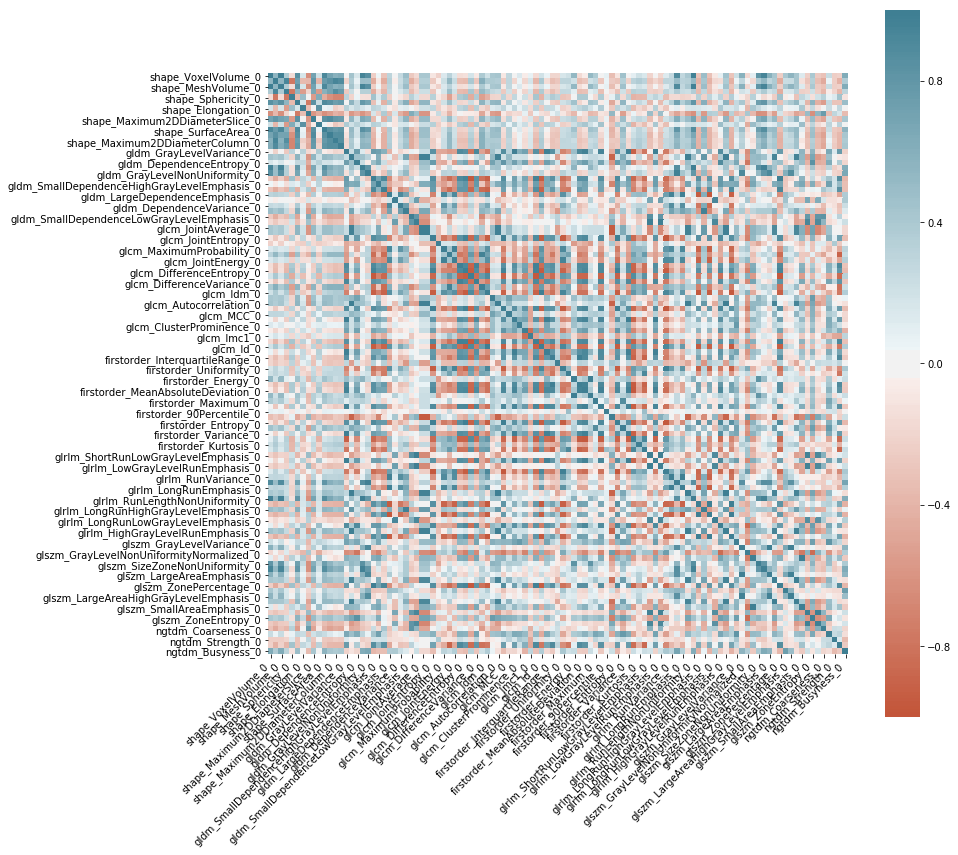

In [22]:
plt.figure(figsize=(13,13))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

Pair plots according to feature classes:

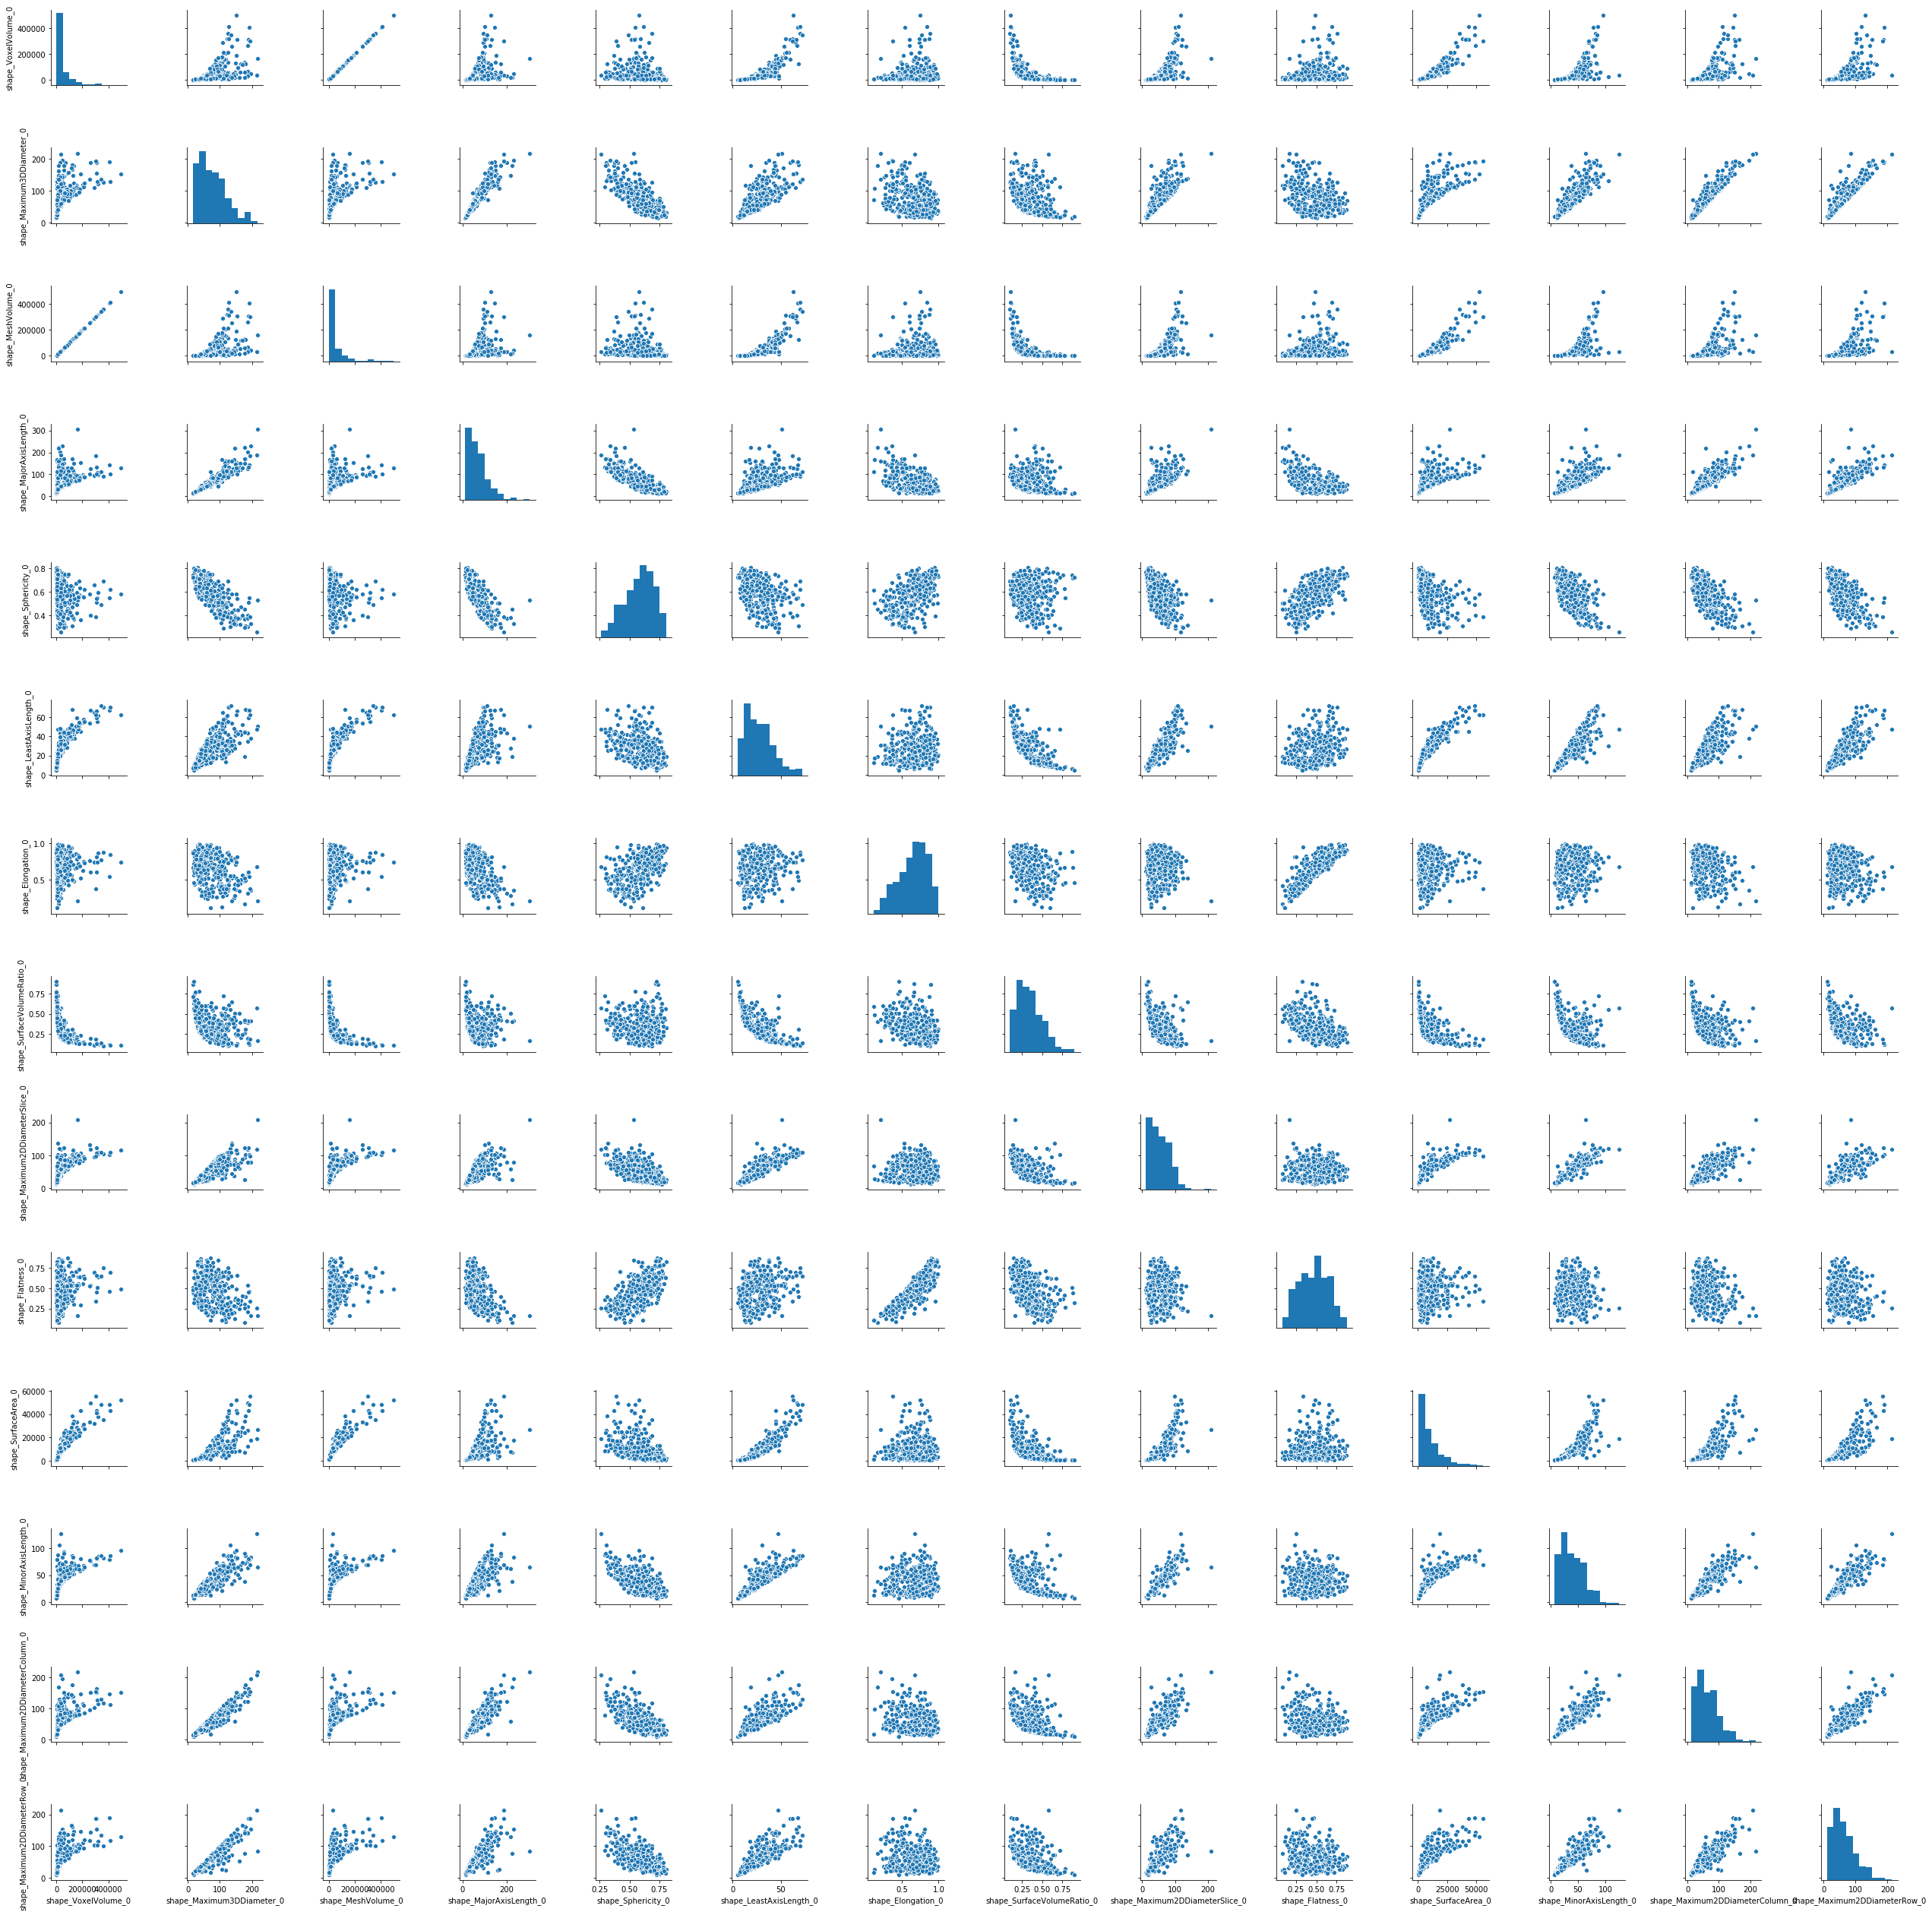

In [27]:
feat_0 = features.str.contains('_0')
feat_shape = features.str.contains('shape_')

features_shape = features[ feat_0 & feat_shape ]
sns.pairplot(X1_train[features_shape])

Some highly correlated variables:
- VoxelVolume and MeshVolume: will only keep VoxelVolume
- Maximum2DDiameterColumn, Maximum2DDiameterRow and Maximum3DDiameter: will only keep Maximum3DDiameter

Log transform some variables?
- VoxelVolume
- SurfaceArea

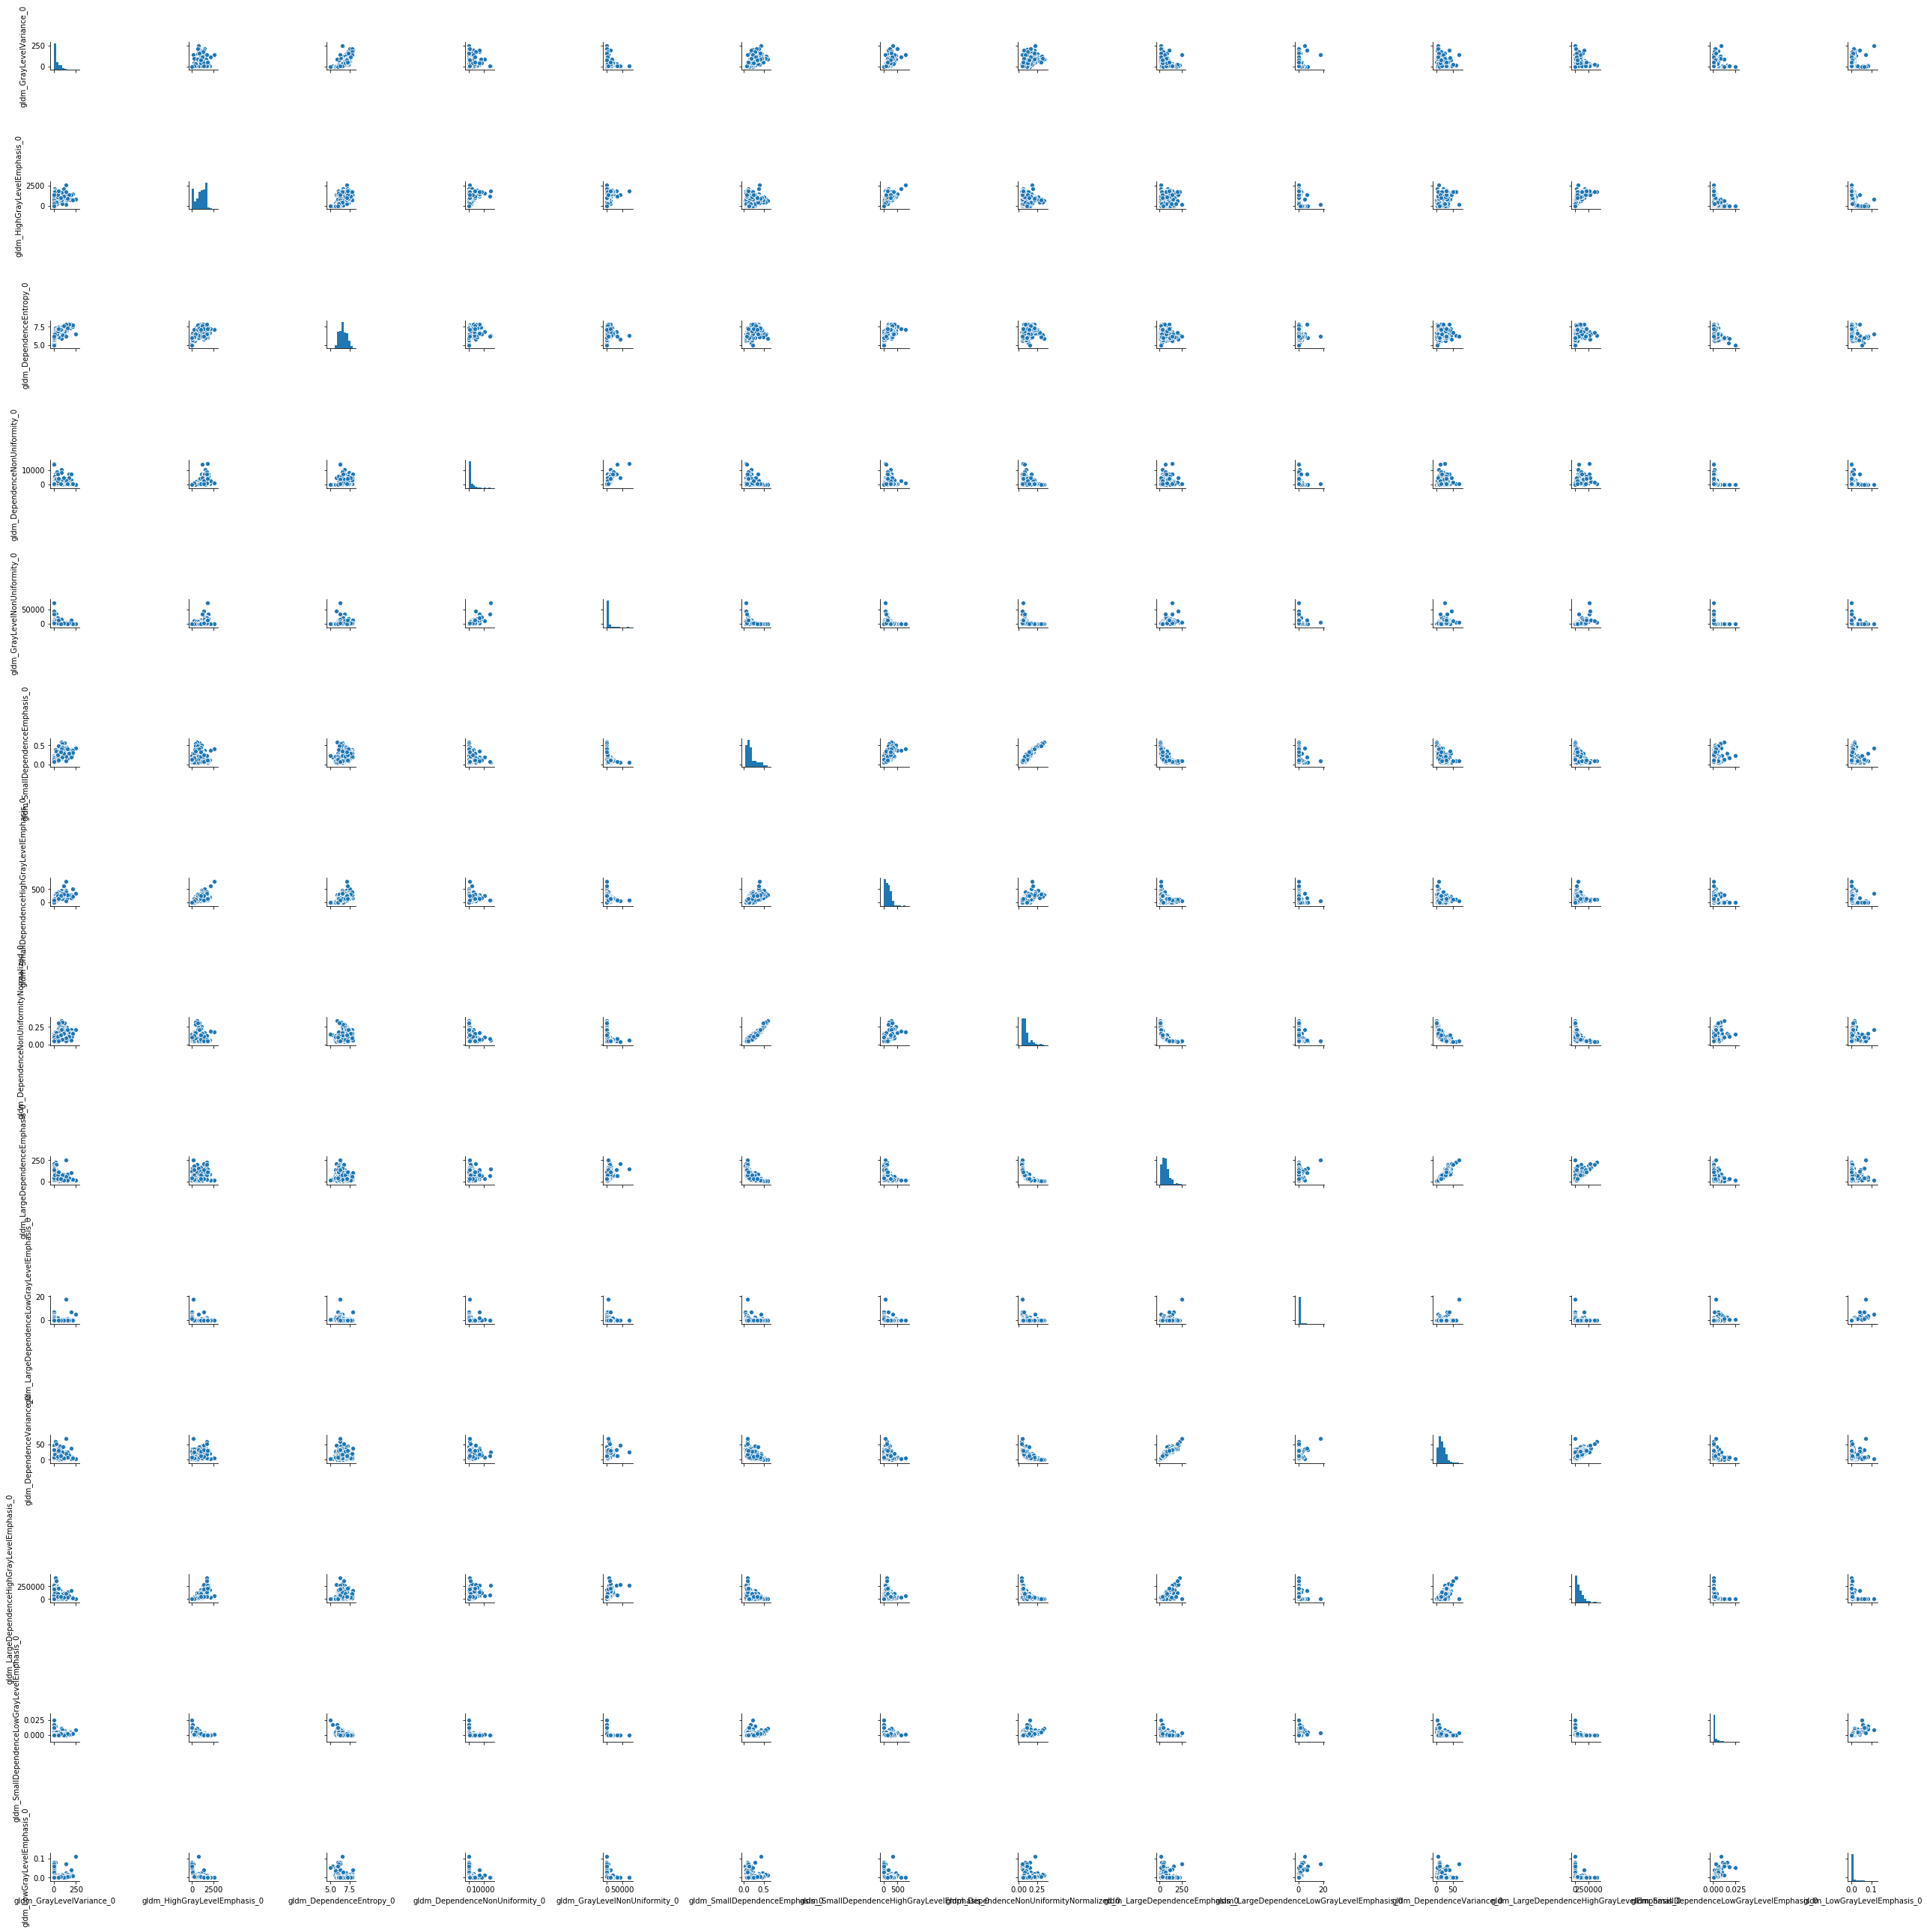

In [28]:
feat_gldm = features.str.contains('gldm_')

features_gldm = features[ feat_0 & feat_gldm ]
sns.pairplot(X1_train[features_gldm])

In [29]:
print(features_gldm)

Index(['gldm_GrayLevelVariance_0', 'gldm_HighGrayLevelEmphasis_0',
       'gldm_DependenceEntropy_0', 'gldm_DependenceNonUniformity_0',
       'gldm_GrayLevelNonUniformity_0', 'gldm_SmallDependenceEmphasis_0',
       'gldm_SmallDependenceHighGrayLevelEmphasis_0',
       'gldm_DependenceNonUniformityNormalized_0',
       'gldm_LargeDependenceEmphasis_0',
       'gldm_LargeDependenceLowGrayLevelEmphasis_0',
       'gldm_DependenceVariance_0',
       'gldm_LargeDependenceHighGrayLevelEmphasis_0',
       'gldm_SmallDependenceLowGrayLevelEmphasis_0',
       'gldm_LowGrayLevelEmphasis_0'],
      dtype='object', name='Merged Feature Name')


High correlation:
- LargeDependenceEmphasis and DependenceVariance

Log transform(?):
- GrayLevelVariance
- DependenceNonUniformity
- GrayLevelNonUniformity
- LargeDependenceLowGrayLevelEmphasis
- SmallDependenceLowGrayLevelEmphasis
- LowGrayLevelEmphasis

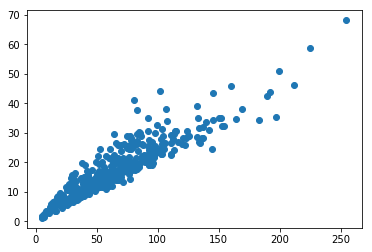

In [30]:
plt.figure()
plt.scatter(df_grand['gldm_LargeDependenceEmphasis_0'], df_grand['gldm_DependenceVariance_0'])
plt.show()

In [31]:
print(df_grand['gldm_LargeDependenceEmphasis_0'].corr(df_grand['gldm_DependenceVariance_0']))

0.9175598962635049


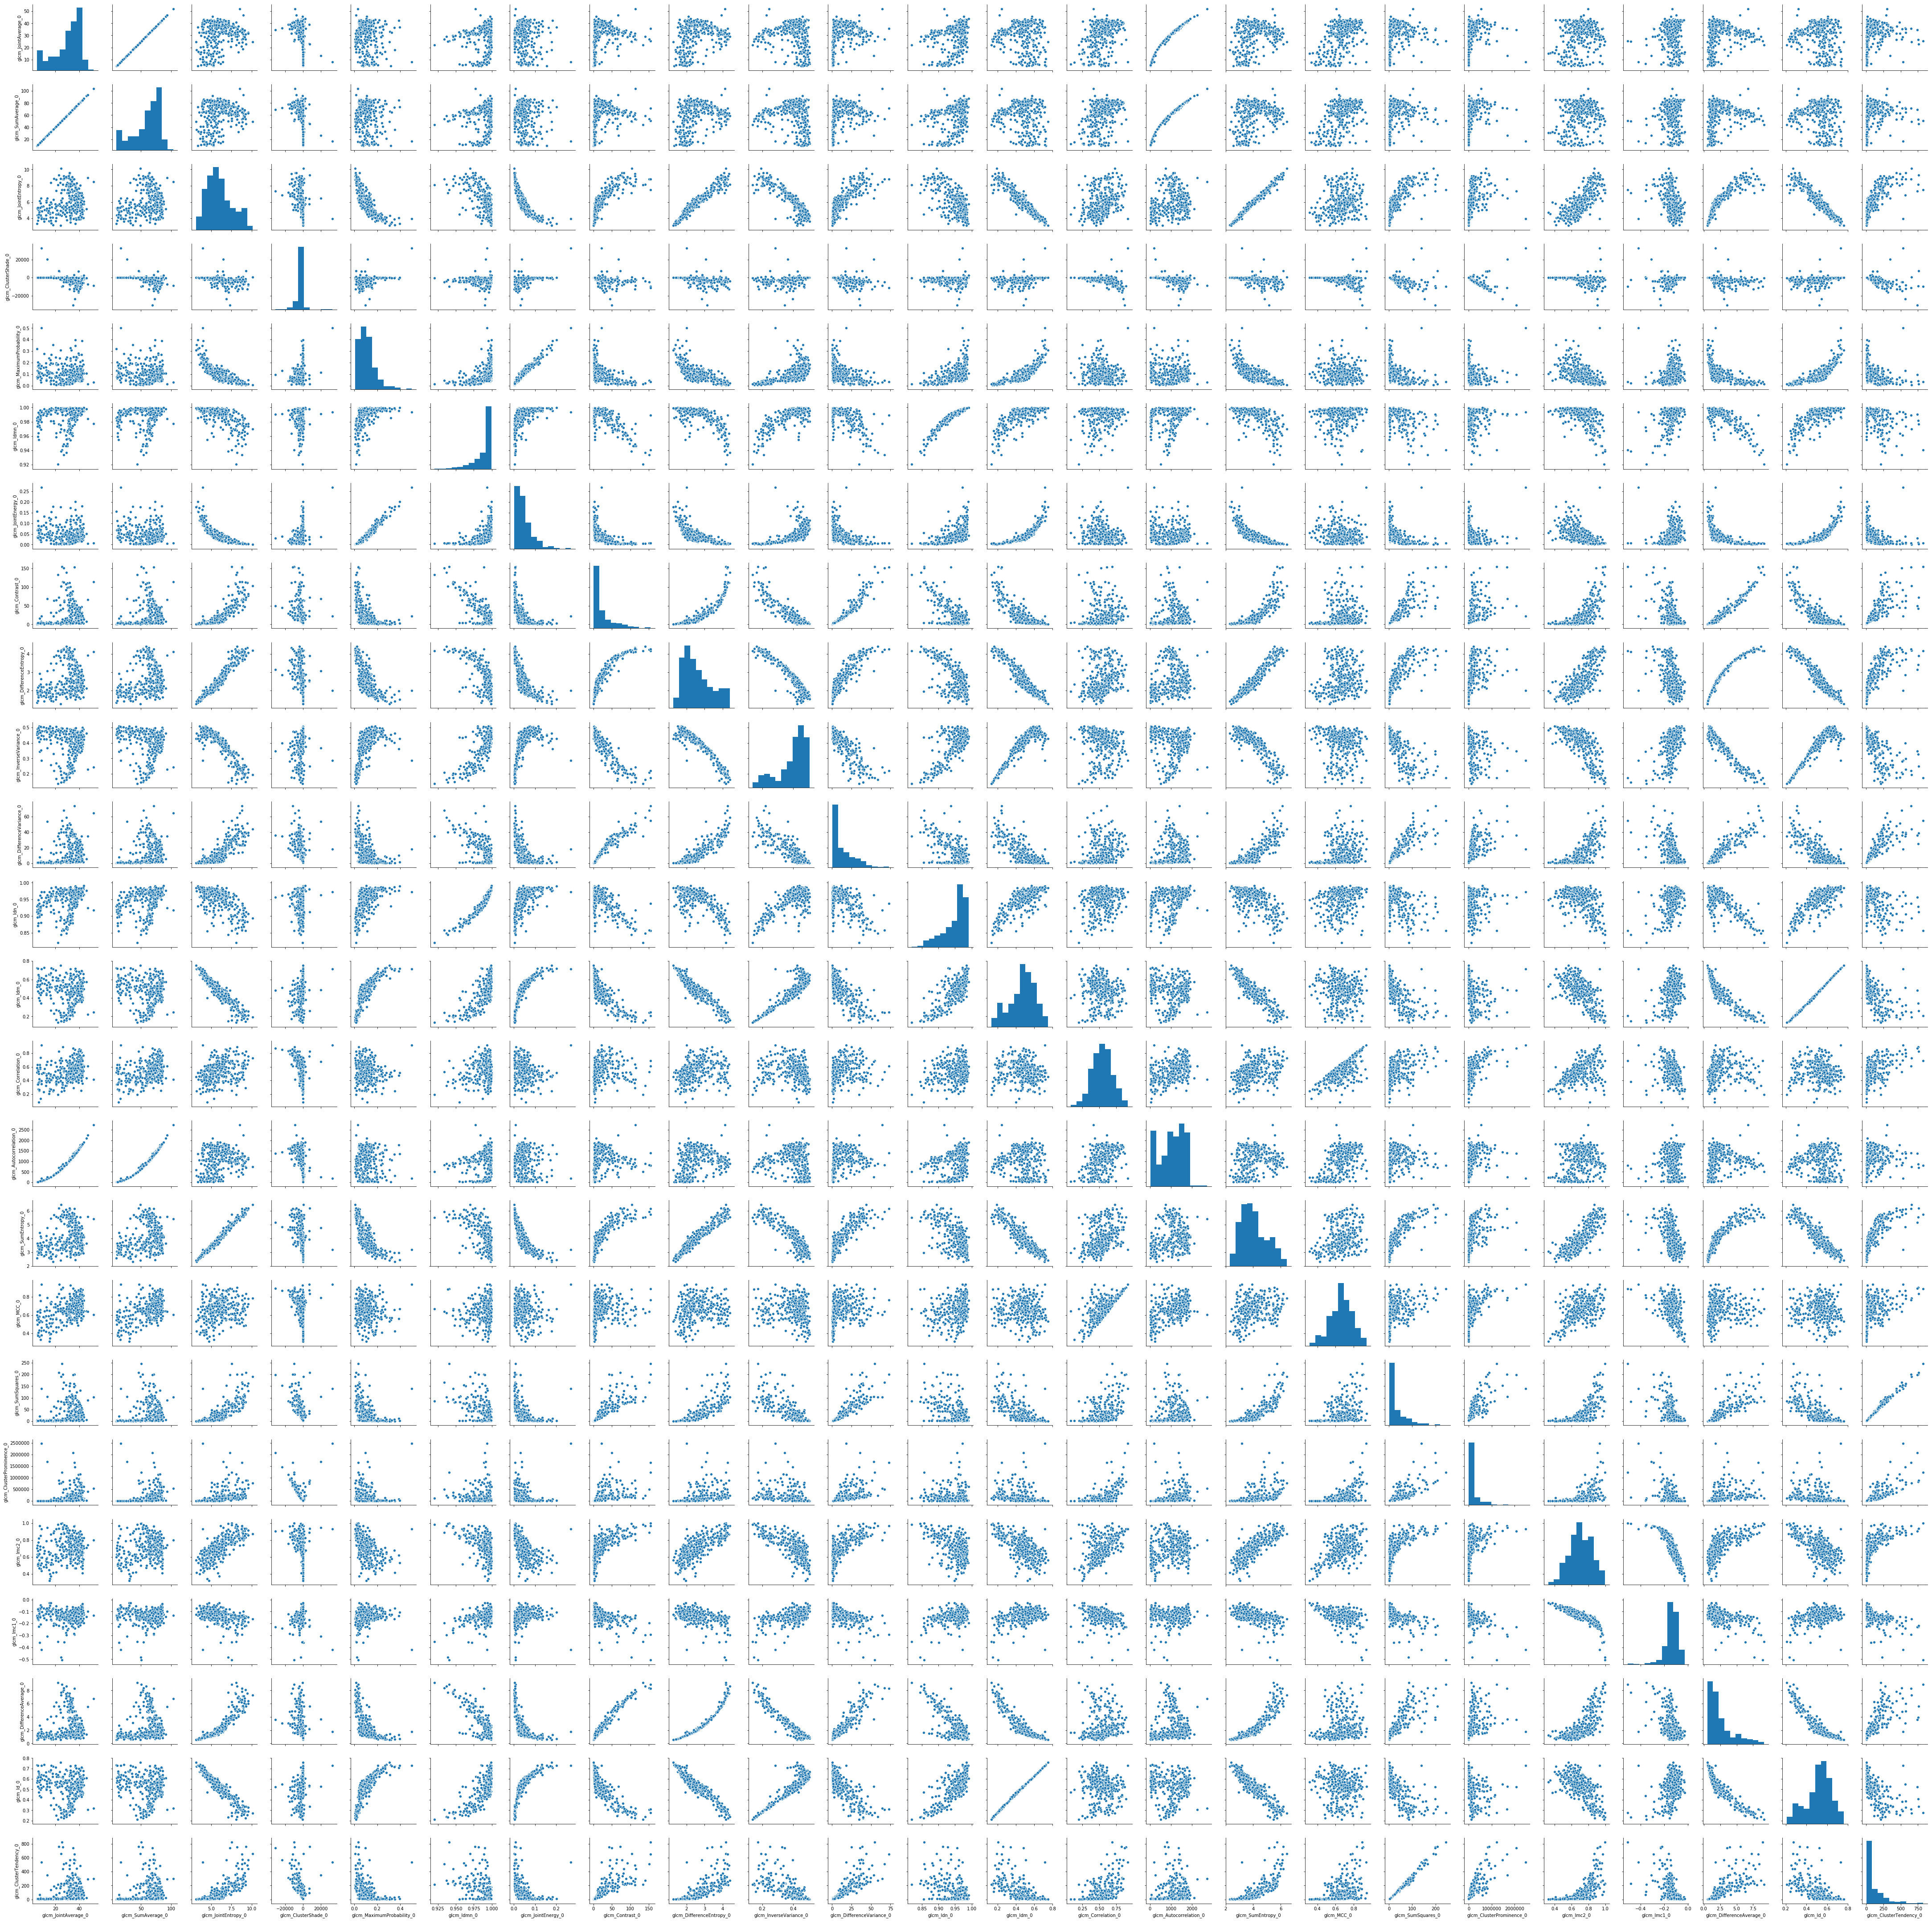

In [32]:
feat_glcm = features.str.contains('glcm_')

features_glcm = features[ feat_0 & feat_glcm ]
sns.pairplot(X1_train[features_glcm])

In [41]:
for fiter in features_glcm:
    for fiter2 in features_glcm:
        if (fiter <= fiter2):
            continue

        r = df_grand[fiter].corr(df_grand[fiter2])
            
        if (r>0.95):
            print(f'{fiter} highly correlated with {fiter2}: r={r}')

glcm_JointAverage_0 highly correlated with glcm_Autocorrelation_0: r=0.9774397363382965
glcm_SumAverage_0 highly correlated with glcm_JointAverage_0: r=0.9999999999999997
glcm_SumAverage_0 highly correlated with glcm_Autocorrelation_0: r=0.9774397363382068
glcm_JointEntropy_0 highly correlated with glcm_DifferenceEntropy_0: r=0.9626165438727179
glcm_MaximumProbability_0 highly correlated with glcm_JointEnergy_0: r=0.9768262377892947
glcm_DifferenceEntropy_0 highly correlated with glcm_DifferenceAverage_0: r=0.9565448578746123
glcm_DifferenceVariance_0 highly correlated with glcm_Contrast_0: r=0.9536843319340661
glcm_Idn_0 highly correlated with glcm_Idmn_0: r=0.9609779642756617
glcm_Idm_0 highly correlated with glcm_Id_0: r=0.999083320998913
glcm_SumEntropy_0 highly correlated with glcm_JointEntropy_0: r=0.9892166922473336
glcm_SumEntropy_0 highly correlated with glcm_DifferenceEntropy_0: r=0.9617369485928797
glcm_SumSquares_0 highly correlated with glcm_ClusterTendency_0: r=0.99431262

High correlation:
- SumAverage, JointAverage and AutoCorrelation
- SumEntropy, DifferenceEntropy and JointEntropy
- Idm and Id
- Idn and Idmn
- SumSquares and ClusterTendency
- DifferenceEntropy and DifferenceAverage (strong correspondence, not correlation in Pearson r's sense)
- DifferenceAverage and Contrast

Log transform(?):
- ldmn (reverse log transform for rising function)
- JointEnergy
- Contrast
- DifferenceVariance
- ldn (reverse log transform)
- SumSquares
- ClusterProminence
- ClusterTendency
- DifferenceAverage

Double peak
- Id

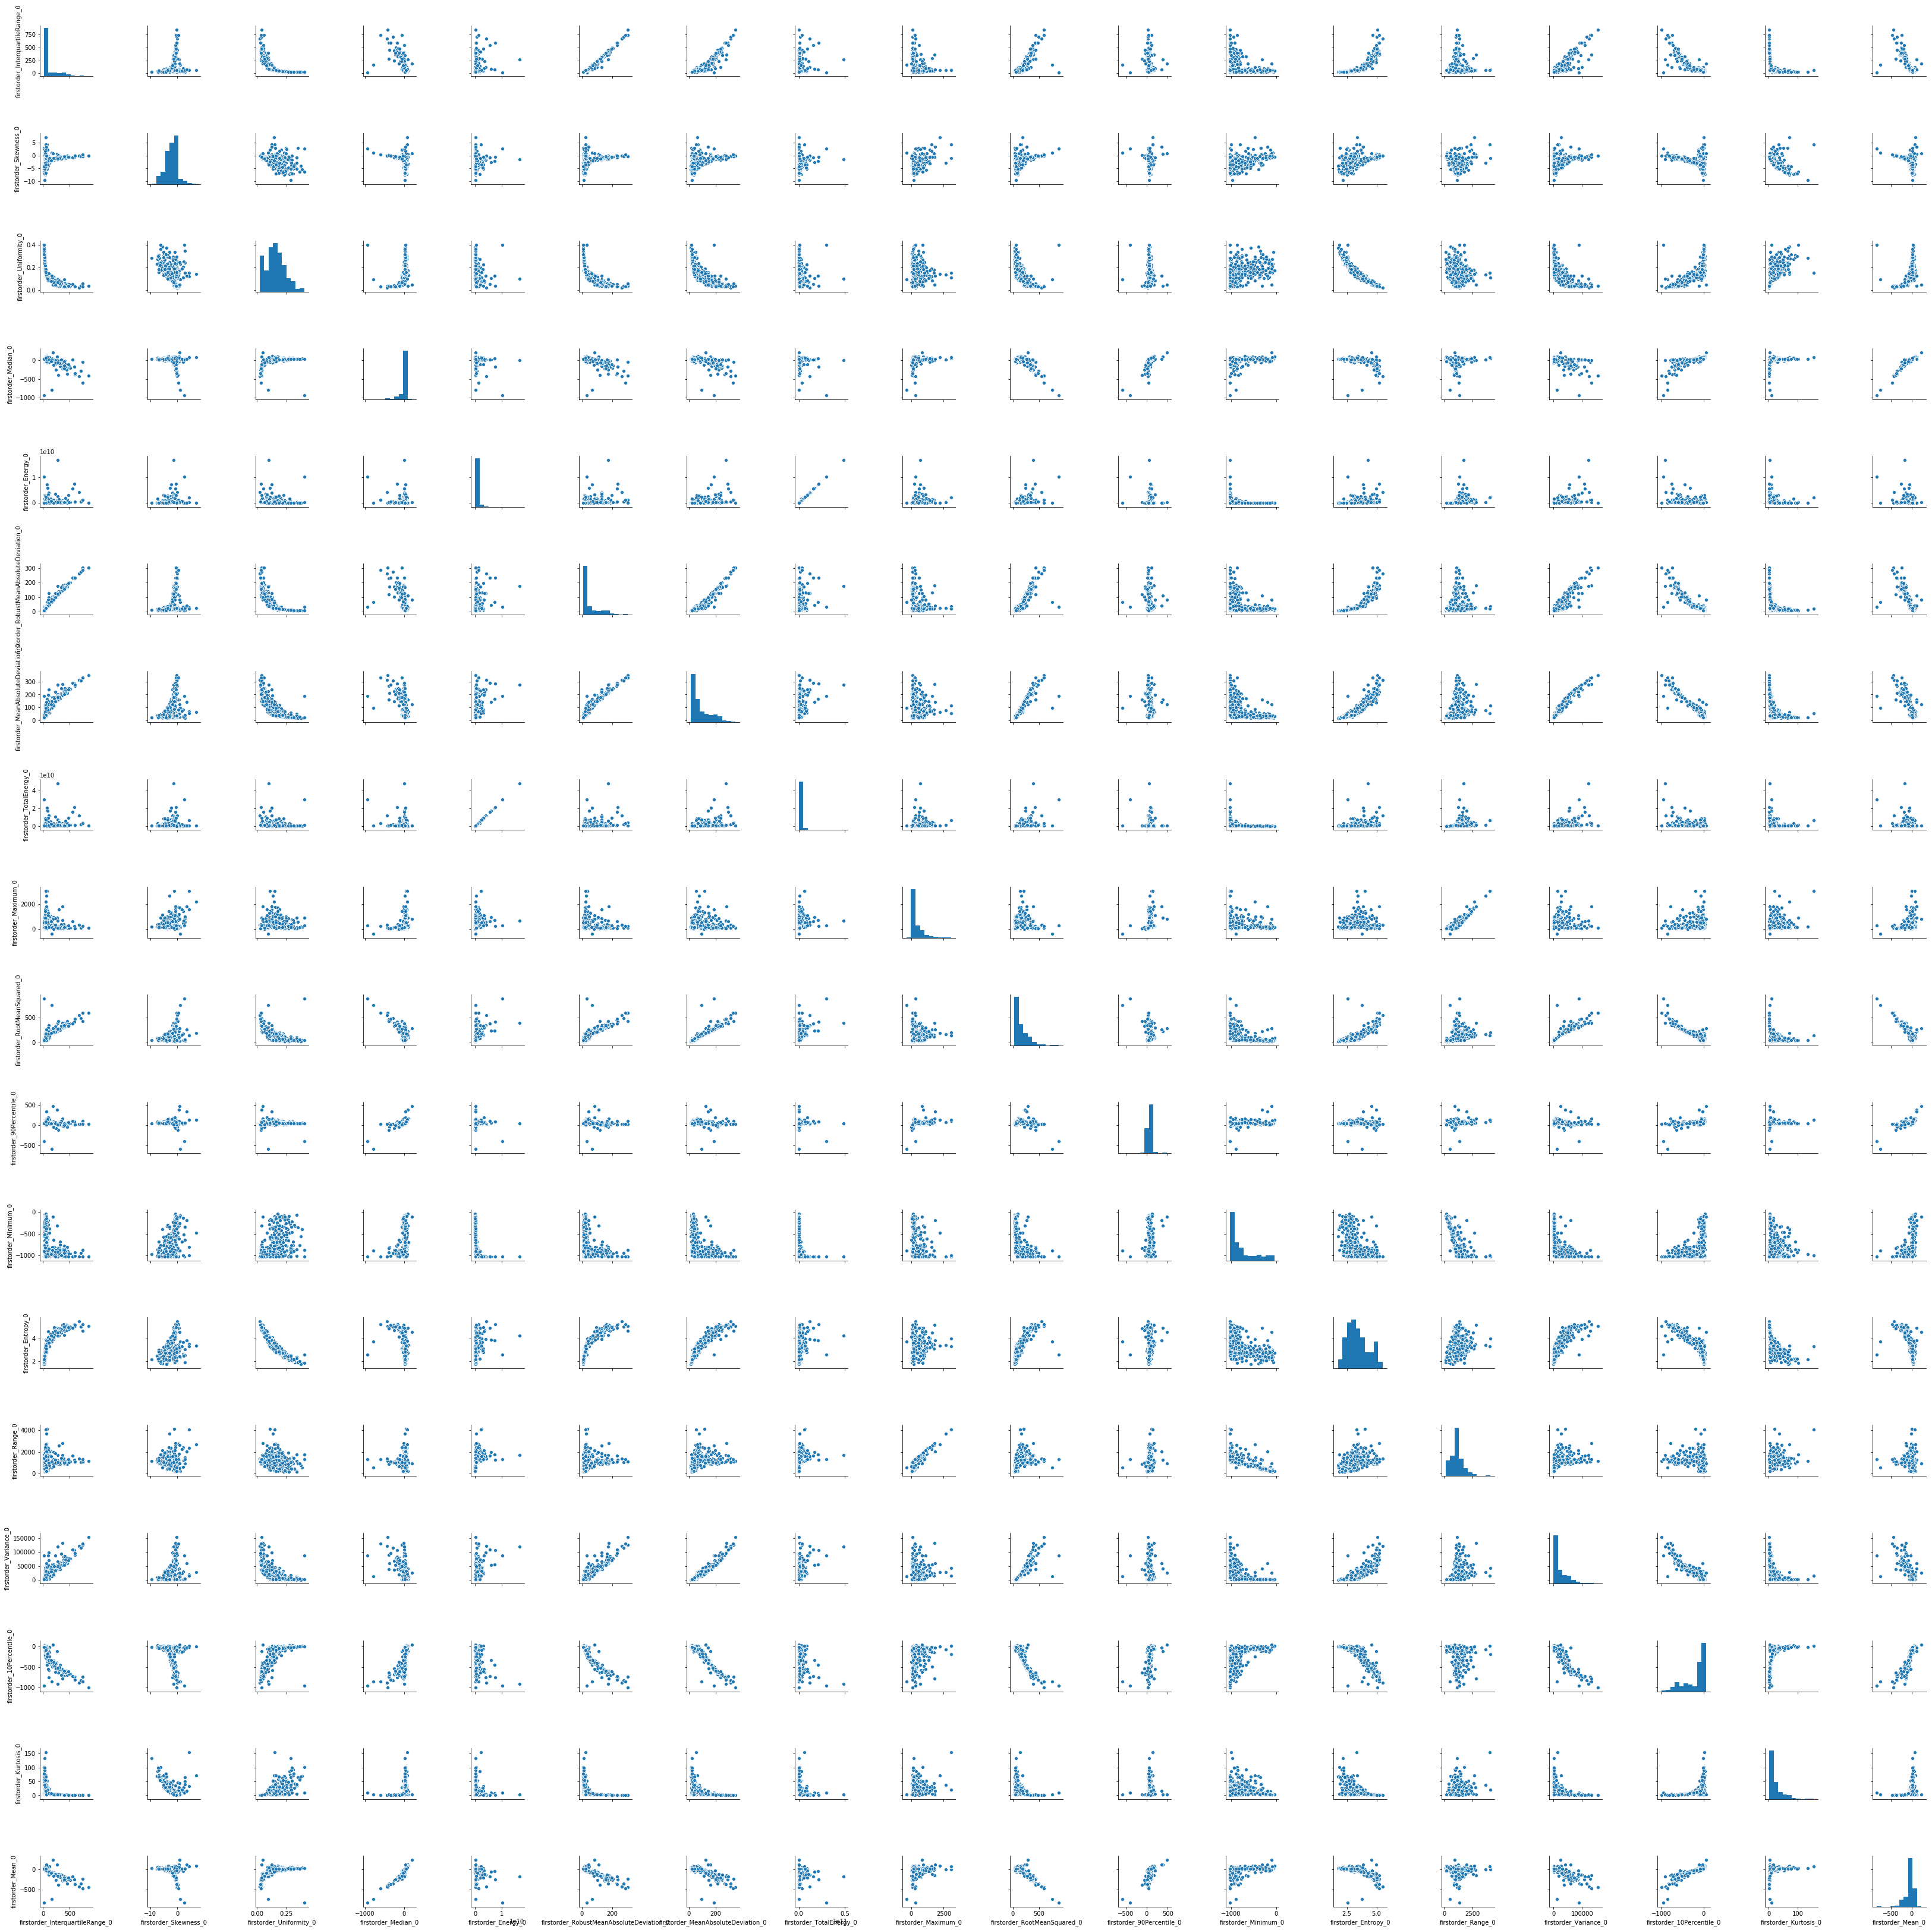

In [33]:
feat_firstorder = features.str.contains('firstorder_')

features_firstorder = features[ feat_0 & feat_firstorder ]
sns.pairplot(X1_train[features_firstorder])

In [39]:
for fiter in features_firstorder:
    for fiter2 in features_firstorder:
        if (fiter == fiter2):
            continue

        r = df_grand[fiter].corr(df_grand[fiter2])
            
        if (r>0.95):
            print(f'{fiter} highly correlated with {fiter2}: r={r}')

firstorder_InterquartileRange_0 highly correlated with firstorder_RobustMeanAbsoluteDeviation_0: r=0.9865762653618481
firstorder_Energy_0 highly correlated with firstorder_TotalEnergy_0: r=0.9993594025084611
firstorder_RobustMeanAbsoluteDeviation_0 highly correlated with firstorder_InterquartileRange_0: r=0.9865762653618482
firstorder_RobustMeanAbsoluteDeviation_0 highly correlated with firstorder_MeanAbsoluteDeviation_0: r=0.953858688639902
firstorder_MeanAbsoluteDeviation_0 highly correlated with firstorder_RobustMeanAbsoluteDeviation_0: r=0.9538586886399019
firstorder_MeanAbsoluteDeviation_0 highly correlated with firstorder_Variance_0: r=0.9694007350612796
firstorder_TotalEnergy_0 highly correlated with firstorder_Energy_0: r=0.999359402508461
firstorder_Variance_0 highly correlated with firstorder_MeanAbsoluteDeviation_0: r=0.9694007350612794


High correlation:
- InterquartileRange, RobustMeanAbsoluteDeviation and MeanAbsoluteDeviation
- Energy and TotalEnergy
- Variance and MeanAbsoluteDeviation

Log transform(?):
- InterquartileRange
- Median (inverse log)
- Energy
- RobustMeanAbsoluteDeviation
- MeanAbsoluteDeviation
- TotalEnergy
- Maximum
- RootMeanSquare
- Minimum
- Kurtosis

Double peaks
- 10Percentile

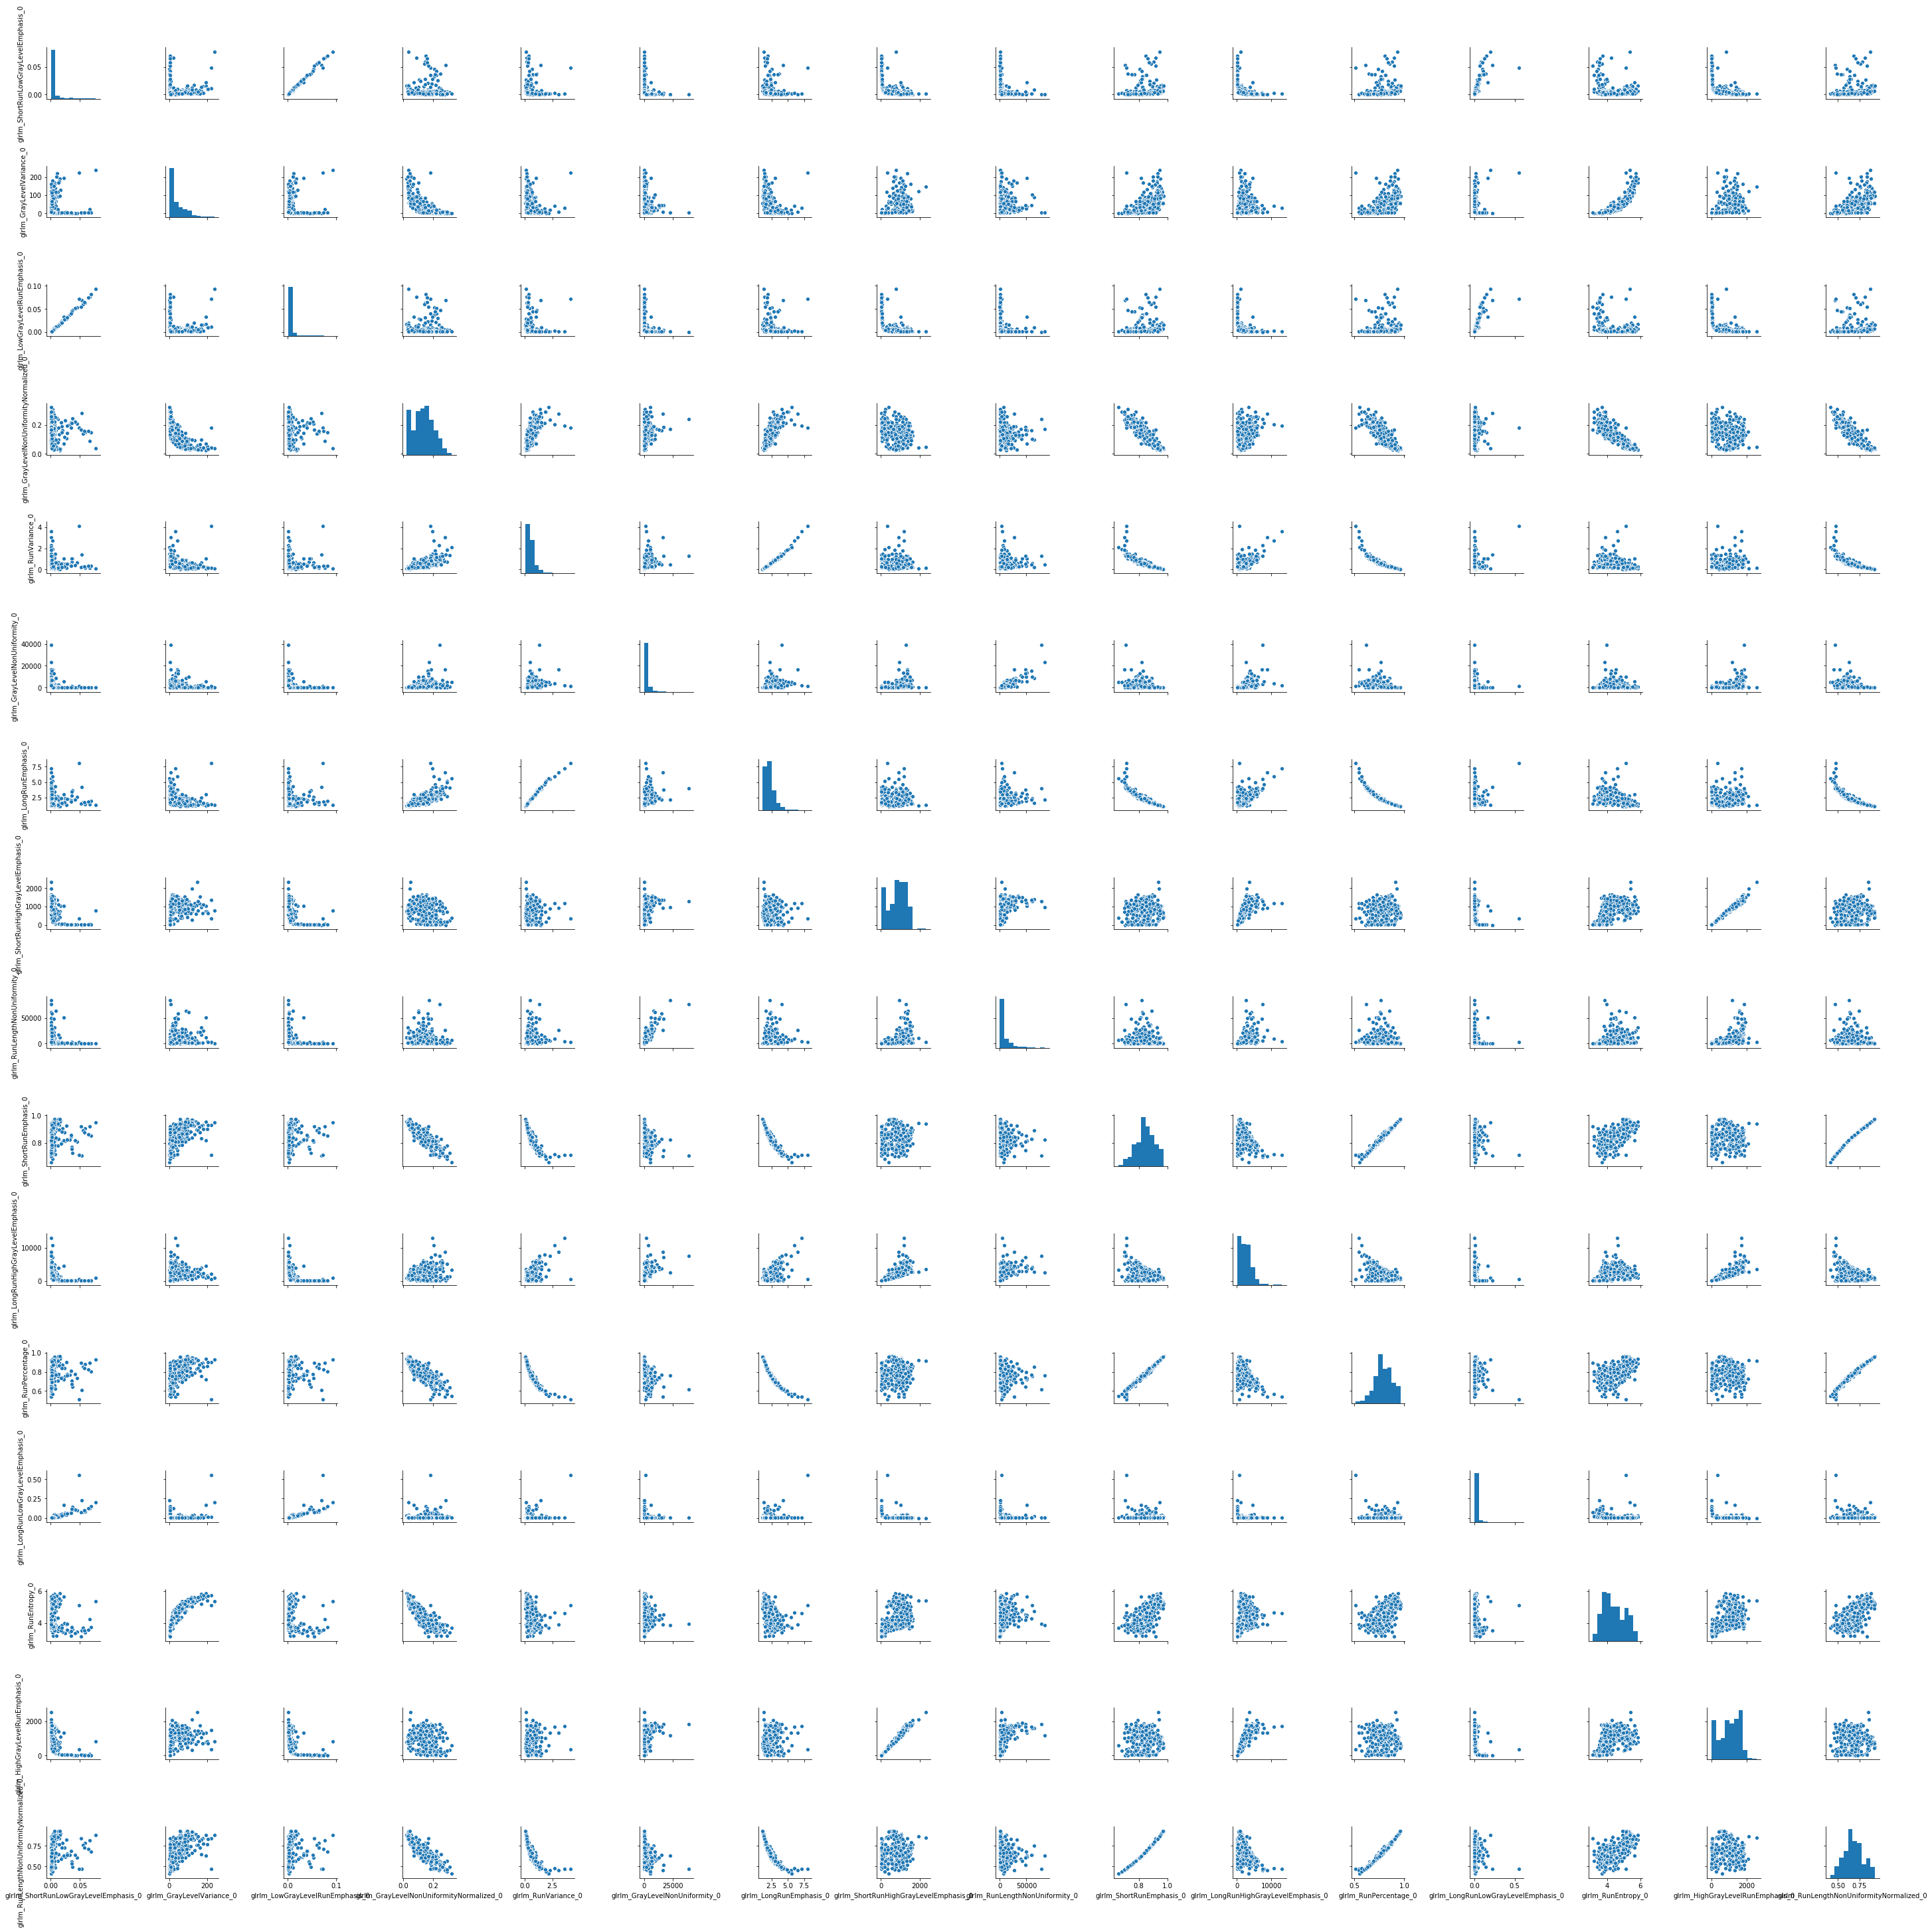

In [46]:
feat_glrlm = features.str.contains('glrlm_')

features_glrlm = features[ feat_0 & feat_glrlm ]
sns.pairplot(X1_train[features_glrlm])

In [47]:
for fiter in features_glrlm:
    for fiter2 in features_glrlm:
        if (fiter == fiter2):
            continue

        r = df_grand[fiter].corr(df_grand[fiter2])
            
        if (r>0.95):
            print(f'{fiter} highly correlated with {fiter2}: r={r}')

glrlm_ShortRunLowGrayLevelEmphasis_0 highly correlated with glrlm_LowGrayLevelRunEmphasis_0: r=0.9960767300961432
glrlm_LowGrayLevelRunEmphasis_0 highly correlated with glrlm_ShortRunLowGrayLevelEmphasis_0: r=0.9960767300961432
glrlm_RunVariance_0 highly correlated with glrlm_LongRunEmphasis_0: r=0.9882785953404571
glrlm_LongRunEmphasis_0 highly correlated with glrlm_RunVariance_0: r=0.988278595340457
glrlm_ShortRunHighGrayLevelEmphasis_0 highly correlated with glrlm_HighGrayLevelRunEmphasis_0: r=0.9906676988500154
glrlm_ShortRunEmphasis_0 highly correlated with glrlm_RunPercentage_0: r=0.9903786575792123
glrlm_ShortRunEmphasis_0 highly correlated with glrlm_RunLengthNonUniformityNormalized_0: r=0.9951514711331706
glrlm_RunPercentage_0 highly correlated with glrlm_ShortRunEmphasis_0: r=0.9903786575792123
glrlm_RunPercentage_0 highly correlated with glrlm_RunLengthNonUniformityNormalized_0: r=0.9856545578285927
glrlm_HighGrayLevelRunEmphasis_0 highly correlated with glrlm_ShortRunHighGr

High correlation:
- ShortRunLowGrayLevelEmphasis, LowGrayLevelRunEmphasis, HighGrayLevelRunEmphasis
- RunVariance, LongRunEmphasis
- RunLengthNonUniformityNormalized, ShortRunEmphasis, RunPercentage